<a href="https://colab.research.google.com/github/galymzhan-zharas/Alzheimer-s-prediction/blob/main/Alzheimer's_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!/bin/bash
!kaggle datasets download ankushpanday1/alzheimers-prediction-dataset-global

Dataset URL: https://www.kaggle.com/datasets/ankushpanday1/alzheimers-prediction-dataset-global
License(s): MIT
  0% 0.00/1.45M [00:00<?, ?B/s]
100% 1.45M/1.45M [00:00<00:00, 56.4MB/s]


In [ ]:
import zipfile

# Unzip dataset
with zipfile.ZipFile("alzheimers-prediction-dataset-global.zip", 'r') as zip_ref:
    zip_ref.extractall(".")


# EDA

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/alzheimers_prediction_dataset.csv")
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


## Summary statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

As we can see, we have only 4 numeric columns. We can get the summary statistic only on these columns

In [ ]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


## Visualizations

I will use histogram for numeric features. It will show the frequency of certain ranges

In [ ]:
age_col = df['Age']
education_col = df['Education Level']
bmi_col = df['BMI']
cog_test_score_col = df['Cognitive Test Score']

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Here, we can see that the distribution is almost uniform between 50 and 90, about 6700. Then, there is slightly more number of people between 90 and 94, about 8200.

Text(0, 0.5, 'Frequency')

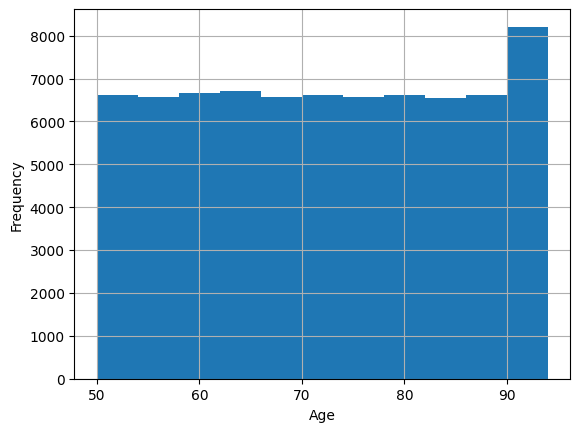

In [ ]:
age_col.hist(bins=11)
plt.xlabel('Age')
plt.ylabel('Frequency')

<Axes: xlabel='Age', ylabel='Count'>

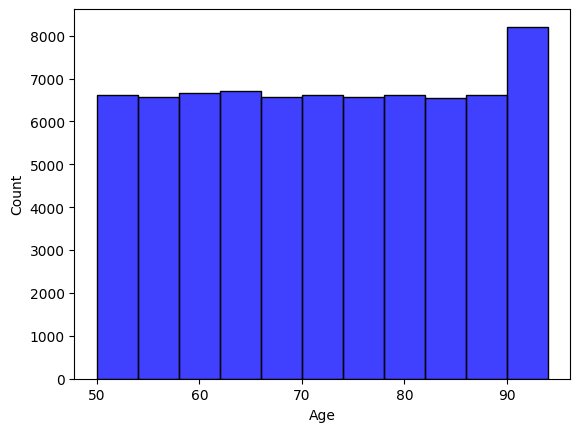

In [ ]:
sns.histplot(age_col, bins=11, color='blue')

The education level ranges between 0 and 19. Because the range is small, I thought that 19 bins would be more informative.
Indeed, we learn that there is almost equal number of people with the education levels between 0 and 18, about 3800. But, much more people have the education level between 18 and 19, about 7300.

Text(0, 0.5, 'Frequency')

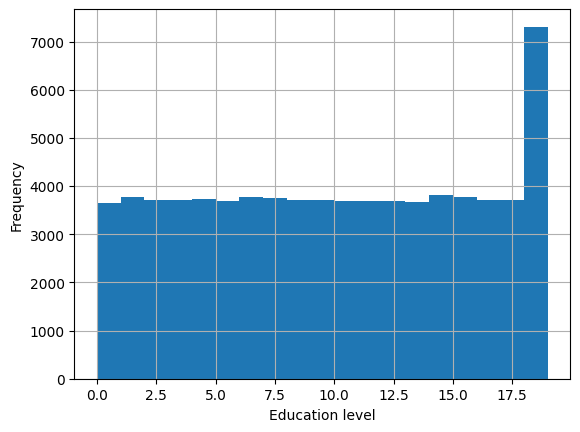

In [ ]:
education_col.hist(bins=19)
plt.xlabel('Education level')
plt.ylabel('Frequency')

Again, the frequency of BMI levels is also more or less uniform

Text(0, 0.5, 'Frequency')

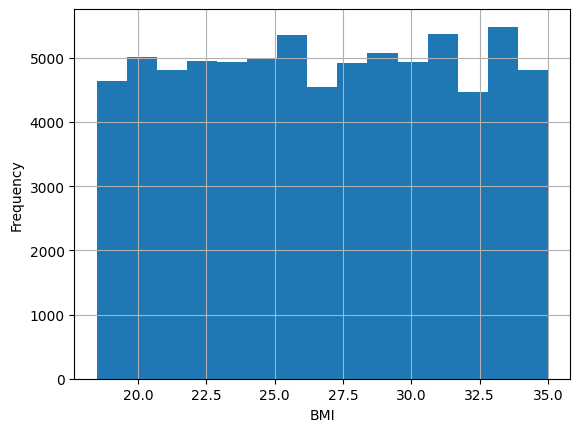

In [ ]:
bmi_col.hist(bins=15)
plt.xlabel('BMI')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

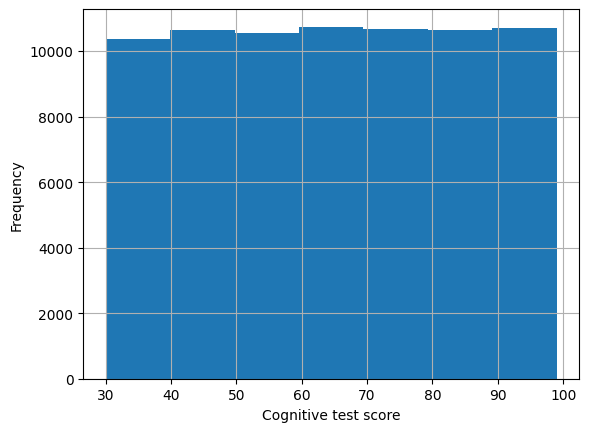

In [ ]:
cog_test_score_col.hist(bins=7)
plt.xlabel('Cognitive test score')
plt.ylabel('Frequency')

Summary from visualizations on numerical data
The dataset appears to be well-balanced: there is an almost uniform distribution of frequencies of samples.

### Categorical features

<ipython-input-14-466438c3f8e1>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


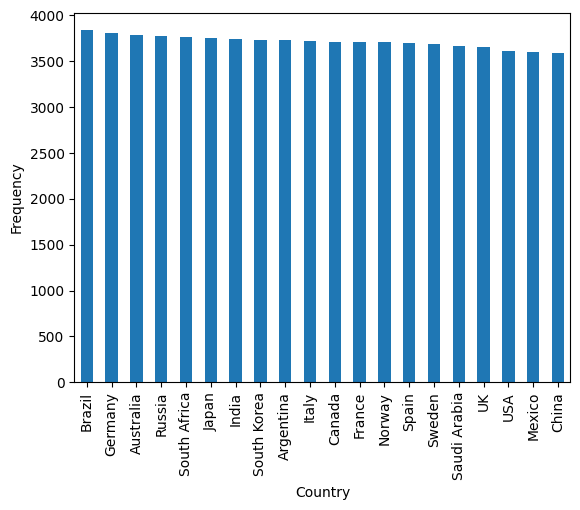

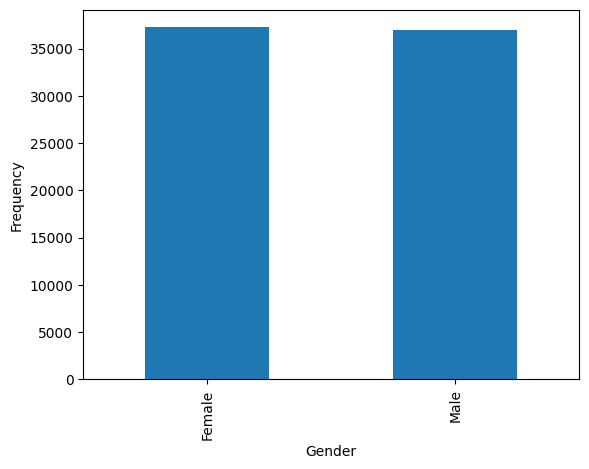

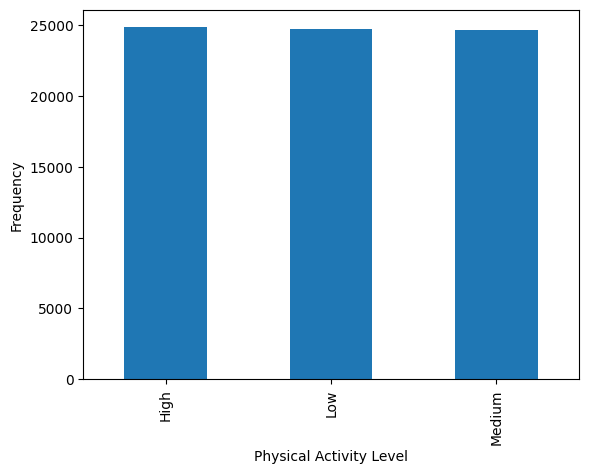

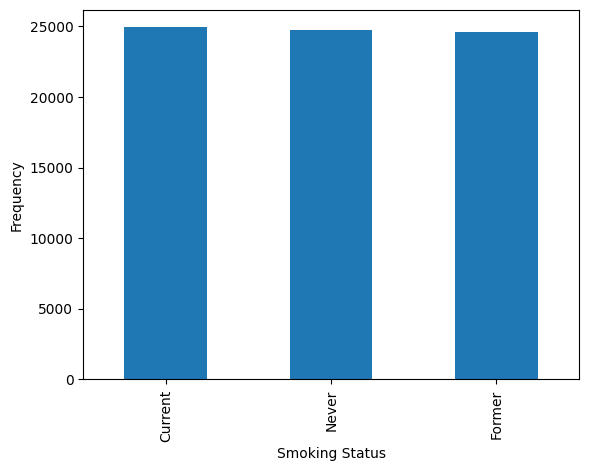

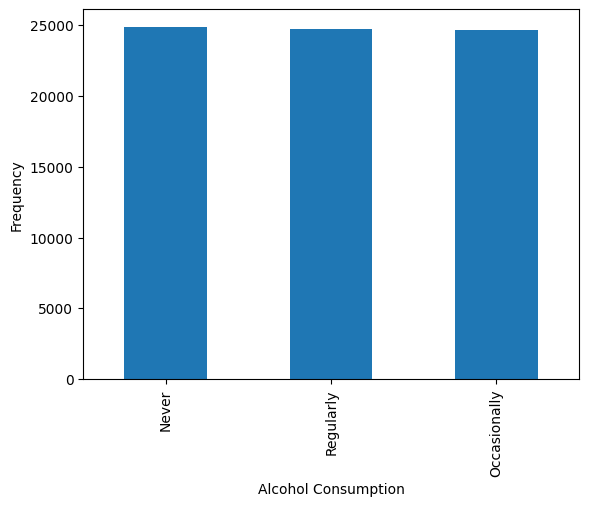

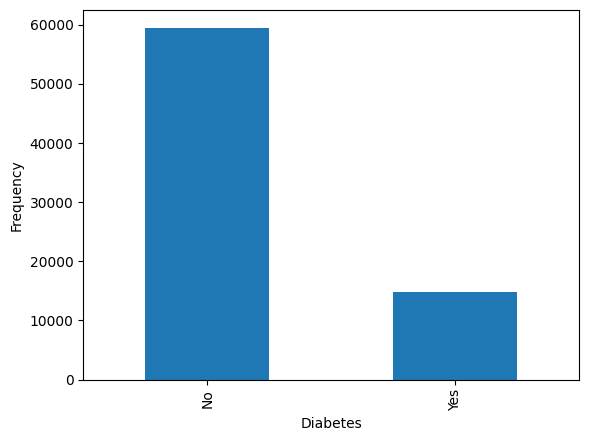

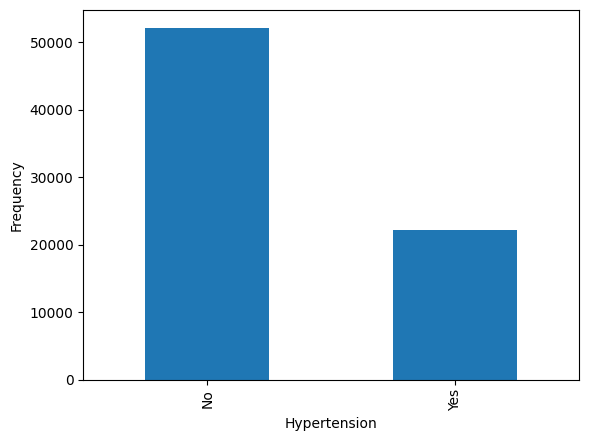

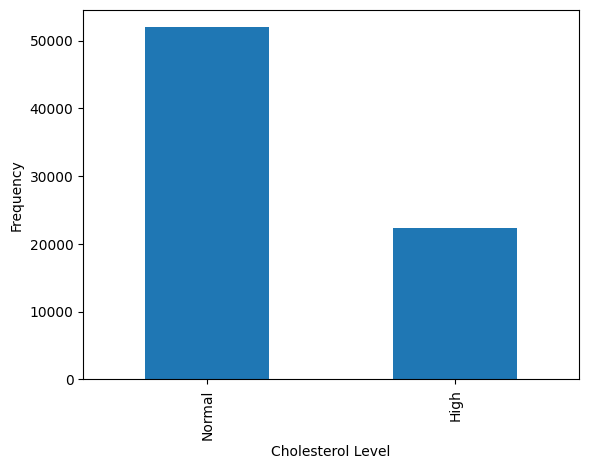

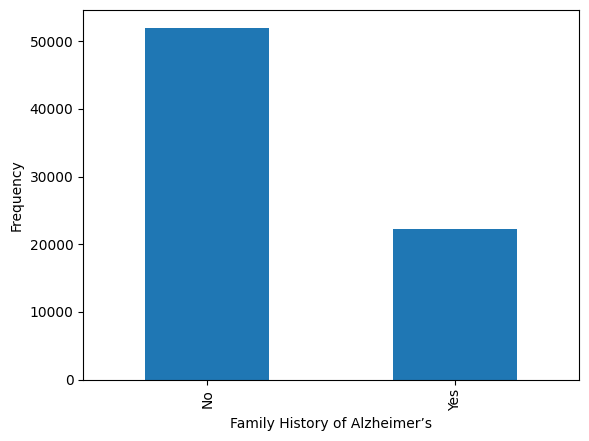

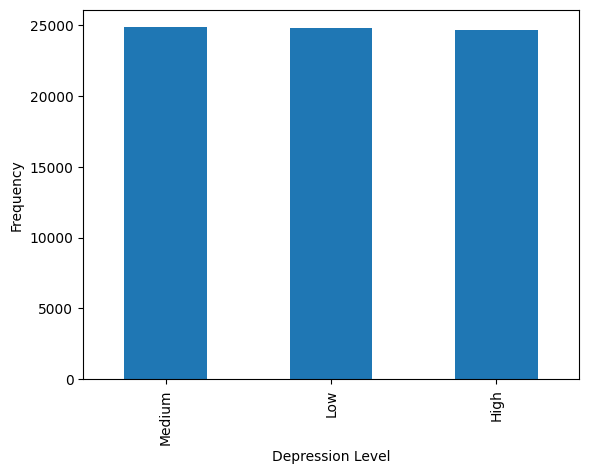

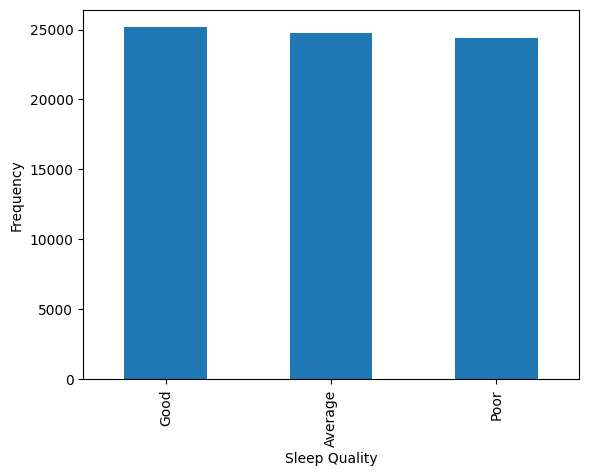

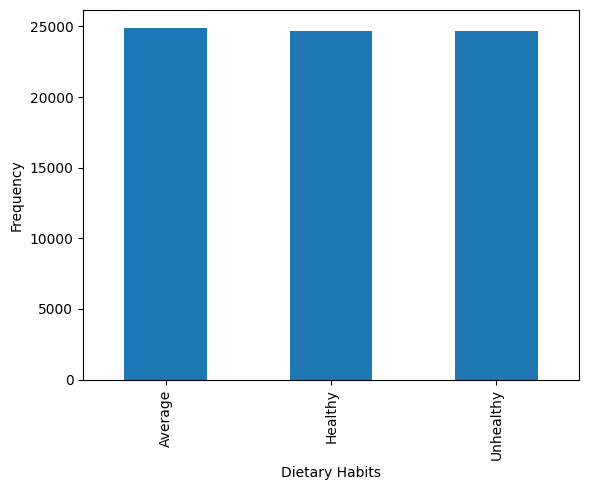

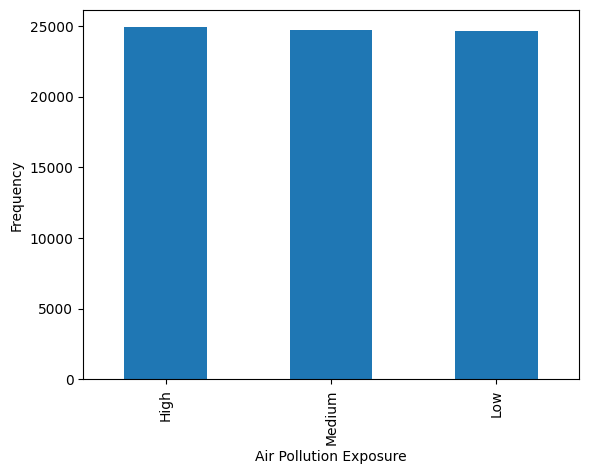

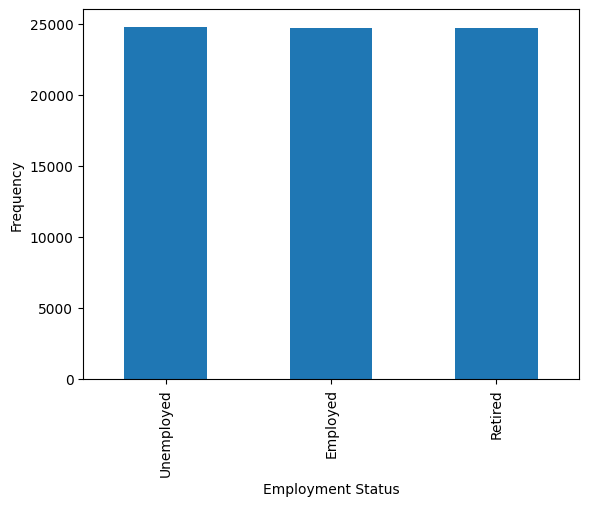

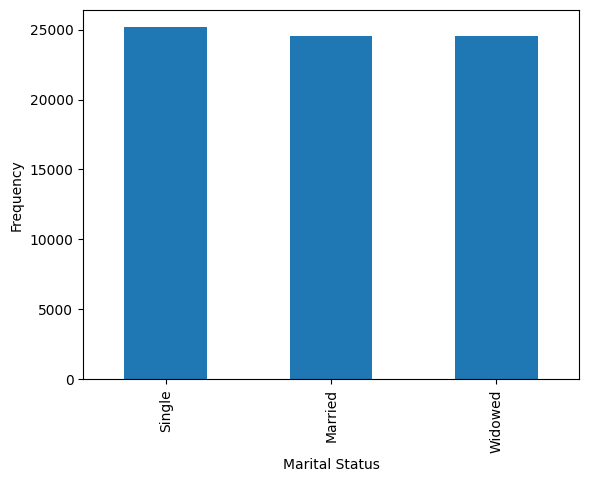

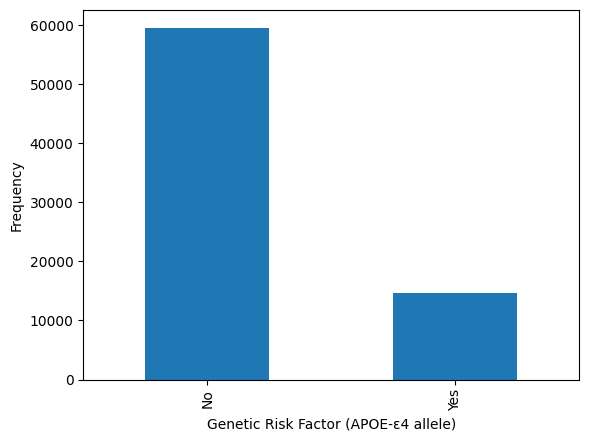

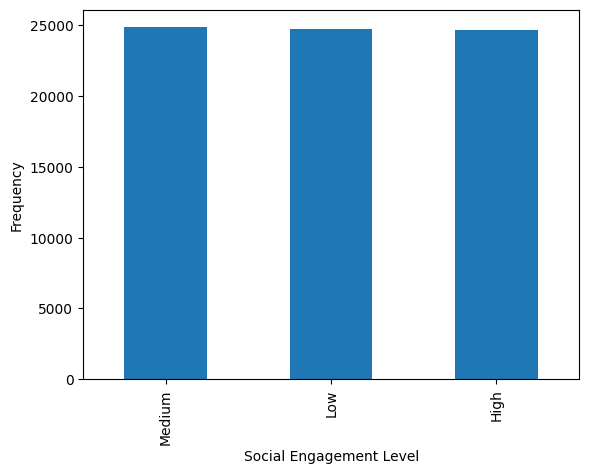

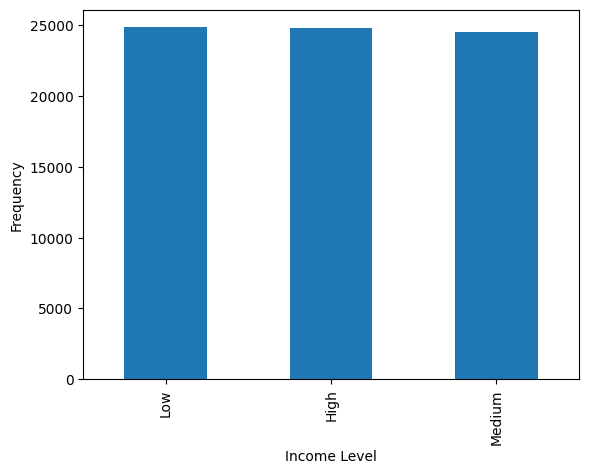

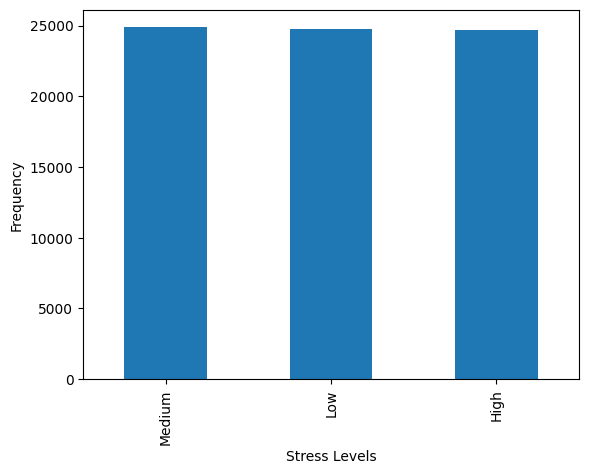

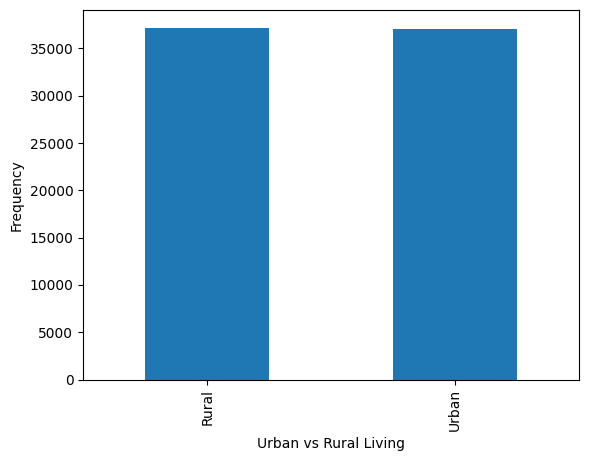

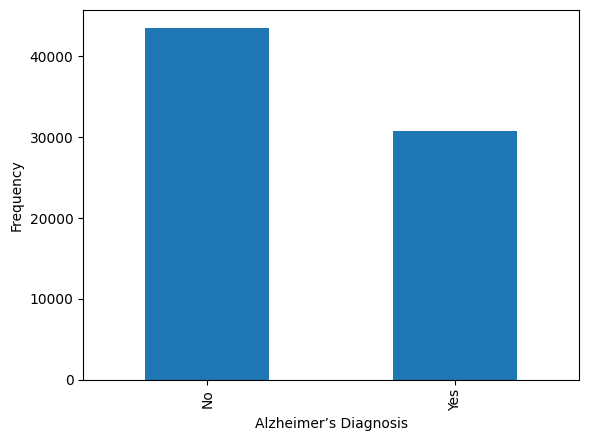

In [ ]:
for column in df.select_dtypes(include=['object']).columns:
  plt.figure()
  df[column].value_counts().plot(kind='bar')
  plt.xlabel(column)
  plt.ylabel('Frequency')

### Summary
we can see that the distribution is also uniform except for 'Alzheimer diagnosis', 'Genetic risk factor', 'Family history of Alzheimers', 'Cholesterol level', 'Hypertension', 'Diabetes'.

# Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, y = df.drop(columns=['Alzheimer’s Diagnosis']), df['Alzheimer’s Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)
y_train_df = pd.DataFrame(y_train, columns=['Alzheimer’s Diagnosis'])
X_test_df = pd.DataFrame(X_test, columns=X.columns)
y_test_df = pd.DataFrame(y_test, columns=['Alzheimer’s Diagnosis'])

train_df = pd.concat([X_train_df, y_train_df], axis=1)
test_df = pd.concat([X_test_df, y_test_df], axis=1)

# Data preprocessing

## Feature Engineering: converting categorical values to numerical

In [ ]:
categorical = df.select_dtypes(include=['object']).columns
print(categorical)

Index(['Country', 'Gender', 'Physical Activity Level', 'Smoking Status',
       'Alcohol Consumption', 'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Depression Level', 'Sleep Quality',
       'Dietary Habits', 'Air Pollution Exposure', 'Employment Status',
       'Marital Status', 'Genetic Risk Factor (APOE-ε4 allele)',
       'Social Engagement Level', 'Income Level', 'Stress Levels',
       'Urban vs Rural Living', 'Alzheimer’s Diagnosis'],
      dtype='object')


In [ ]:
for col in categorical:
    print(f"{col} unique values:")
    print(df[col].unique(), "\n")

Country unique values:
['Spain' 'Argentina' 'South Africa' 'China' 'Sweden' 'South Korea'
 'Germany' 'UK' 'Canada' 'India' 'Italy' 'USA' 'Russia' 'Japan'
 'Australia' 'France' 'Norway' 'Saudi Arabia' 'Mexico' 'Brazil'] 

Gender unique values:
['Male' 'Female'] 

Physical Activity Level unique values:
['Medium' 'High' 'Low'] 

Smoking Status unique values:
['Never' 'Former' 'Current'] 

Alcohol Consumption unique values:
['Occasionally' 'Never' 'Regularly'] 

Diabetes unique values:
['No' 'Yes'] 

Hypertension unique values:
['No' 'Yes'] 

Cholesterol Level unique values:
['Normal' 'High'] 

Family History of Alzheimer’s unique values:
['No' 'Yes'] 

Depression Level unique values:
['Low' 'High' 'Medium'] 

Sleep Quality unique values:
['Poor' 'Good' 'Average'] 

Dietary Habits unique values:
['Healthy' 'Average' 'Unhealthy'] 

Air Pollution Exposure unique values:
['High' 'Medium' 'Low'] 

Employment Status unique values:
['Retired' 'Unemployed' 'Employed'] 

Marital Status unique valu



```
# This is formatted as code
```

Nominal columns:
Country, Gender, Smoking Status, Alcohol Consumption, Diabetes, Hypertension, Family History of Alzheimer’s, Employment Status, Marital Status, Genetic Risk Factor (APOE-ε4 allele), Urban vs Rural Living, Alzheimer’s Diagnosis

Ordinal columns:
Physical Activity Level, Cholesterol Level, Depression Level, Sleep Quality, Dietary Habits, Air Pollution Exposure, Social Engagement Level, Income Level, Stress Levels

The unhealthy habits should have higher values

### Encoding ordinal columns

In [ ]:
categorical_cols = 'Country, Gender, Diabetes, Hypertension, Family History of Alzheimer’s, Employment Status, Marital Status, Genetic Risk Factor (APOE-ε4 allele), Urban vs Rural Living, Alzheimer’s Diagnosis'
categorical_cols = categorical_cols.split(', ')
# print(len(categorical_cols))
# ordinal_cols = 'Physical Activity Level, Smoking Status, Alcohol Consumption, Cholesterol Level, Depression Level, Sleep Quality, Dietary Habits, Air Pollution Exposure, Social Engagement Level, Income Level, Stress Levels'
# ordinal_cols = ordinal_cols.split(', ')

ordinal_cols_other = ['Sleep Quality', "Dietary Habits", "Alcohol Consumption", "Smoking Status", "Cholesterol Level"]
mapper = {
    "Poor":3,
    "Average":1,
    "Good": 0,
    "Healthy":0,
    "Unhealthy":3,
    "Regularly":4,
    "Occasionally":2,
    "Never":0,
    "Former":200,
    "Current":400,
    "Normal":0,
    "High":3
}
# print(len(ordinal_cols))

In [ ]:
df_encoded = train_df.copy()

In [ ]:
df['Smoking Status'].unique()

array(['Never', 'Former', 'Current'], dtype=object)

In [ ]:
df_encoded['Smoking Status'].unique()

array(['Current', 'Never', 'Former'], dtype=object)

In [ ]:
for col in ordinal_cols_other:
  df_encoded[col] = df_encoded[col].map(mapper)

In [ ]:
df_encoded['Physical Activity Level'] = df['Physical Activity Level'].map({"High":0, "Medium":1, "Low":3})
df_encoded['Air Pollution Exposure'] = df_encoded['Air Pollution Exposure'].map({"High":2, "Medium":1, "Low":0})
df_encoded['Depression Level'] = df_encoded['Depression Level'].map({"High":2, "Medium":1, "Low":0})
df_encoded['Social Engagement Level'] = df_encoded['Social Engagement Level'].map({"High":0, "Medium":1, "Low":2})
df_encoded['Income Level'] = df_encoded['Income Level'].map({"High":0, "Medium":1, "Low":2})
df_encoded['Stress Levels'] = df_encoded['Stress Levels'].map({"High":2, "Medium":1, "Low":0})


In [ ]:
df_encoded.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

### Encoding nominal columns

In [ ]:
df_encoded_linear = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols)

In [ ]:
df_encoded_linear = df_encoded_linear.loc[15:].astype(int)
df_encoded = df_encoded.loc[15:].astype(int)

### Standardizing columns

don't touch label
What about values that are 1 or 0?
What about values that are 1, 0, 3?
What about values like age and BMI?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_scale = ['Age', 'Education Level', 'BMI', 'Cognitive Test Score']
scaler.fit(df_encoded[cols_to_scale])

df_encoded_scaled = df_encoded.copy()
df_encoded_linear_scaled = df_encoded_linear.copy()

df_encoded_scaled[cols_to_scale] = scaler.transform(df_encoded[cols_to_scale])
df_encoded_linear_scaled[cols_to_scale] = scaler.transform(df_encoded_linear[cols_to_scale])

## Check for the correlation using Correlation matrix

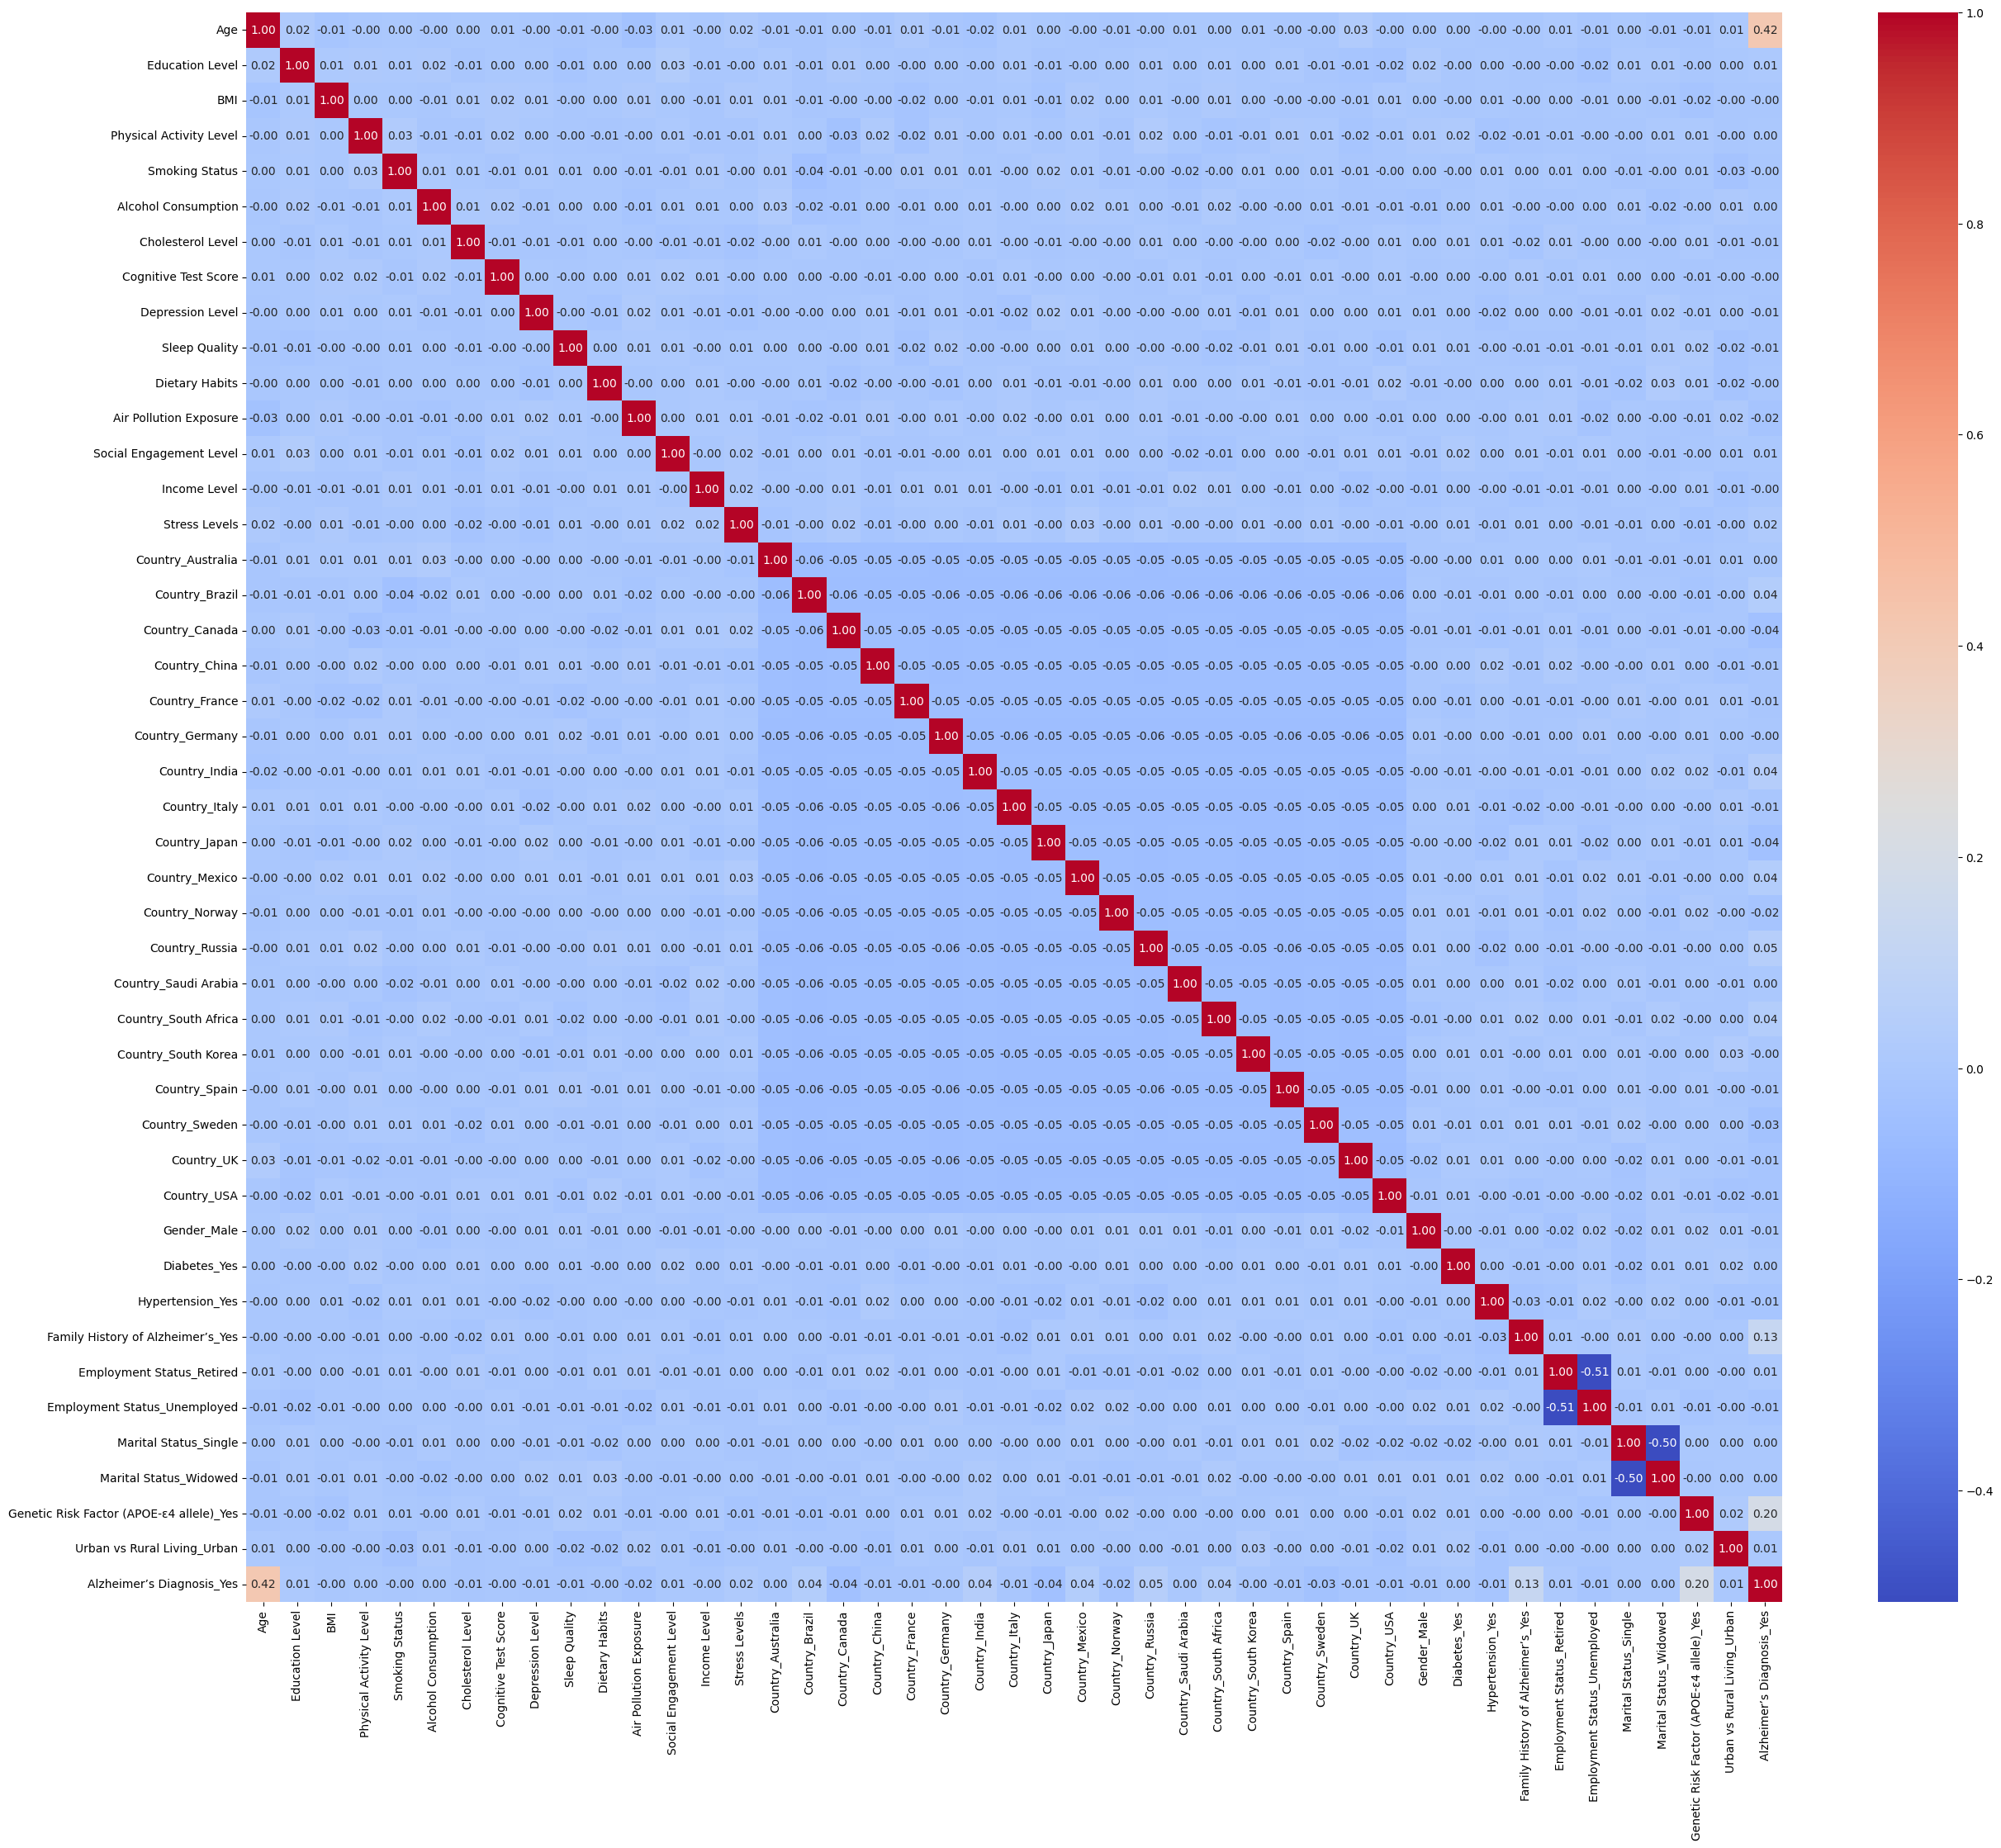

In [ ]:
plt.figure(figsize=(30,25))
sns.heatmap(df_encoded_linear_scaled.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
print(df_encoded_linear_scaled.corr()["Alzheimer’s Diagnosis_Yes"].sort_values(ascending=False))

Alzheimer’s Diagnosis_Yes                   1.000000
Age                                         0.416574
Genetic Risk Factor (APOE-ε4 allele)_Yes    0.195116
Family History of Alzheimer’s_Yes           0.129177
Country_Russia                              0.047919
Country_India                               0.041531
Country_Mexico                              0.039953
Country_Brazil                              0.037839
Country_South Africa                        0.035607
Stress Levels                               0.018624
Employment Status_Retired                   0.011843
Education Level                             0.009801
Urban vs Rural Living_Urban                 0.006102
Social Engagement Level                     0.005625
Physical Activity Level                     0.004598
Alcohol Consumption                         0.003927
Marital Status_Widowed                      0.003694
Marital Status_Single                       0.003603
Country_Saudi Arabia                        0.

In [ ]:
df_encoded_linear_scaled['Smoking Status'].unique()

array([  0, 400, 200])

In [ ]:
print(df_encoded_scaled.corr()["Alzheimer’s Diagnosis_Yes"].sort_values(ascending=False))

Alzheimer’s Diagnosis_Yes                   1.000000
Age                                         0.416574
Genetic Risk Factor (APOE-ε4 allele)_Yes    0.195116
Family History of Alzheimer’s_Yes           0.129177
Country_Russia                              0.047919
Country_India                               0.041531
Country_Mexico                              0.039953
Country_Brazil                              0.037839
Country_South Africa                        0.035607
Stress Levels                               0.018624
Hypertension_No                             0.013458
Employment Status_Retired                   0.011843
Education Level                             0.009801
Gender_Female                               0.006672
Urban vs Rural Living_Urban                 0.006102
Social Engagement Level                     0.005625
Physical Activity Level                     0.004598
Alcohol Consumption                         0.003927
Marital Status_Widowed                      0.

## Feature engineering: create new features based on 3 most highly correlated features

In [ ]:
# arr1[~arr1.isin(arr2)]a
most_correlated = ['Age', 'Genetic Risk Factor (APOE-ε4 allele)_Yes', 'Family History of Alzheimer’s_Yes']
least_correlated = df_encoded_linear_scaled.columns[~df_encoded_linear_scaled.columns.isin(most_correlated+["Alzheimer’s Diagnosis_Yes"])]
df_encoded_linear_scaled_eng = df_encoded_linear_scaled.copy()

new_features = {}


for high_cor_col in most_correlated:
  for less_cor_col in least_correlated:
    col_name = f"{high_cor_col}_X_{less_cor_col}"
    new_features[col_name] = df_encoded_linear_scaled_eng[less_cor_col] * df_encoded_linear_scaled_eng[high_cor_col]

new_features_df = pd.DataFrame(new_features)
df_encoded_linear_scaled_eng = pd.concat([df_encoded_linear_scaled_eng, new_features_df], axis=1)

In [ ]:
df_encoded_linear_scaled_eng_corr = df_encoded_linear_scaled_eng.corr()
corr_label = df_encoded_linear_scaled_eng_corr['Alzheimer’s Diagnosis_Yes']

correlations_atleast20 = corr_label[corr_label>0.2]
print(correlations_atleast20.sort_values(ascending=False))

Alzheimer’s Diagnosis_Yes             1.000000
Age                                   0.416574
Age_X_Social Engagement Level         0.328344
Age_X_Air Pollution Exposure          0.325729
Age_X_Depression Level                0.324768
Age_X_Stress Levels                   0.322742
Age_X_Alcohol Consumption             0.319915
Age_X_Smoking Status                  0.319598
Age_X_Income Level                    0.318834
Age_X_Sleep Quality                   0.314127
Age_X_Physical Activity Level         0.309750
Age_X_Dietary Habits                  0.308045
Age_X_Gender_Male                     0.299526
Age_X_Urban vs Rural Living_Urban     0.295705
Age_X_Employment Status_Unemployed    0.246641
Age_X_Marital Status_Widowed          0.242096
Age_X_Employment Status_Retired       0.240699
Age_X_Marital Status_Single           0.234404
Age_X_Hypertension_Yes                0.231089
Age_X_Cholesterol Level               0.229033
Name: Alzheimer’s Diagnosis_Yes, dtype: float64


In [ ]:
corr_label

,Alzheimer’s Diagnosis_Yes
Age,0.416574
Education Level,0.009801
BMI,-0.002105
Physical Activity Level,0.004598
Smoking Status,-0.004222
...,...
Family History of Alzheimer’s_Yes_X_Employment Status_Retired,0.067591
Family History of Alzheimer’s_Yes_X_Employment Status_Unemployed,0.069494
Family History of Alzheimer’s_Yes_X_Marital Status_Single,0.064730
Family History of Alzheimer’s_Yes_X_Marital Status_Widowed,0.069494


## Feature selection

### Select k best

In [ ]:
def selectKbest_baseline(df, kbest, metric):
    selector = SelectKBest(metric, k=kbest)
    x = df.drop(columns=[target])
    y=df[target]
    x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
    x_train_selected = selector.fit_transform(x_train, y_train)
    selected_mask=selector.get_support()
    top_features=x_train.columns[selected_mask]

    x_val_selected = selector.transform(x_val)
    model = GaussianNB()
    model.fit(x_train_selected, y_train)
    y_pred = model.predict(x_val_selected)
    y_prob = model.predict_proba(x_val_selected)[:, 1]

    #   Evaluate the model performance
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_prob)  # AUC score

    save_results(f'selectKbest, k={kbest}', accuracy, precision, recall, f1, auc)
    print(f"Top {kbest} selected features: {list(top_features)}")
    return top_features

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

k = 15  # Number of features to select
selector = SelectKBest(score_func=f_classif, k=k)  # Use f_classif for classification

X_train = df_encoded_linear_scaled_eng.drop(columns=['Alzheimer’s Diagnosis_Yes'])
y_train = df_encoded_linear_scaled_eng['Alzheimer’s Diagnosis_Yes']

X_train_anova = selector.fit_transform(X_train, y_train)  # Select best features
selected_features = X_train.columns[selector.get_support()]  # Get column names

print("Selected Features using SelectKBest:")
print(*selected_features, sep='\n')


Selected Features using SelectKBest:
Age
Age_X_Physical Activity Level
Age_X_Smoking Status
Age_X_Alcohol Consumption
Age_X_Depression Level
Age_X_Sleep Quality
Age_X_Dietary Habits
Age_X_Air Pollution Exposure
Age_X_Social Engagement Level
Age_X_Income Level
Age_X_Stress Levels
Age_X_Gender_Male
Age_X_Employment Status_Unemployed
Age_X_Marital Status_Widowed
Age_X_Urban vs Rural Living_Urban


In [ ]:
mask = ~np.isin(X_train_anova, X_train_mic)

# Apply mask to extract different elements
X_train_anova[mask]


array([], dtype=float64)

In [ ]:
k = 15  # Number of features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)  # Use f_classif for classification

X_train_mic = selector.fit_transform(X_train, y_train)  # Select best features
features_mic = X_train.columns[selector.get_support()]  # Get column names

print("Selected Features using SelectKBest:")
print(*features_mic, sep='\n')


Selected Features using SelectKBest:
Age
Age_X_Education Level
Age_X_BMI
Age_X_Physical Activity Level
Age_X_Smoking Status
Age_X_Alcohol Consumption
Age_X_Cognitive Test Score
Age_X_Depression Level
Age_X_Sleep Quality
Age_X_Dietary Habits
Age_X_Air Pollution Exposure
Age_X_Social Engagement Level
Age_X_Income Level
Age_X_Stress Levels
Age_X_Urban vs Rural Living_Urban


In [ ]:
  # Number of features to select
selector = SelectKBest(score_func=mutual_info_classif, k=k)  # Use f_classif for classification

X_train_mic = selector.fit_transform(X_train, y_train)  # Select best features
features_mic = X_train.columns[selector.get_support()]  # Get column names

print("Selected Features using SelectKBest:")
print(*features_mic, sep='\n')


In [ ]:
X_train_corr = corr_label.sort_values(ascending=False)[:k]
X_train_corr

,Alzheimer’s Diagnosis_Yes
Alzheimer’s Diagnosis_Yes,1.000000
Age,0.416574
Age_X_Social Engagement Level,0.328344
Age_X_Air Pollution Exposure,0.325729
Age_X_Depression Level,0.324768
Age_X_Stress Levels,0.322742
Age_X_Alcohol Consumption,0.319915
Age_X_Smoking Status,0.319598
Age_X_Income Level,0.318834
Age_X_Sleep Quality,0.314127


### RFE

In [ ]:
from sklearn.feature_selection import RFECV


In [ ]:
rfecv_rf = RandomForestClassifier()
rfecv = RFECV(rfecv_rf)  # Select top 15 features
X_train_rfe = rfecv.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[rfecv.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Age', 'Education Level', 'BMI', 'Physical Activity Level',
       'Smoking Status', 'Alcohol Consumption', 'Cholesterol Level',
       'Cognitive Test Score', 'Depression Level', 'Sleep Quality',
       ...
       'Family History of Alzheimer’s_Yes_X_Cognitive Test Score',
       'Family History of Alzheimer’s_Yes_X_Depression Level',
       'Family History of Alzheimer’s_Yes_X_Sleep Quality',
       'Family History of Alzheimer’s_Yes_X_Dietary Habits',
       'Family History of Alzheimer’s_Yes_X_Air Pollution Exposure',
       'Family History of Alzheimer’s_Yes_X_Social Engagement Level',
       'Family History of Alzheimer’s_Yes_X_Income Level',
       'Family History of Alzheimer’s_Yes_X_Stress Levels',
       'Family History of Alzheimer’s_Yes_X_Gender_Male',
       'Family History of Alzheimer’s_Yes_X_Urban vs Rural Living_Urban'],
      dtype='object', length=115)


## Outlier detection

The below code shows us that there are no missing values

In [ ]:
df.isnull().sum()

,0
Country,0
Age,0
Gender,0
Education Level,0
BMI,0
Physical Activity Level,0
Smoking Status,0
Alcohol Consumption,0
Diabetes,0
Hypertension,0


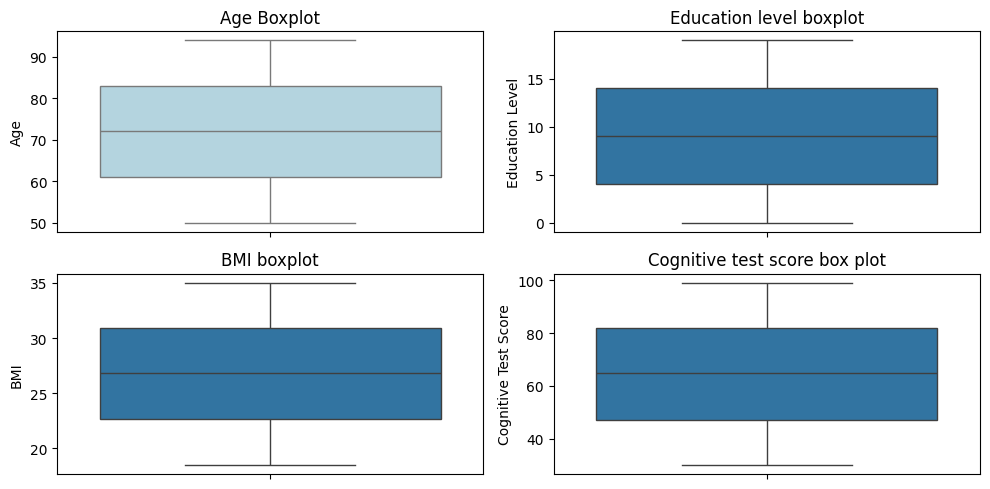

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
sns.boxplot(y=age_col, color='lightblue')
plt.title('Age Boxplot')

plt.subplot(2,2,2)
sns.boxplot(y=education_col)
plt.title('Education level boxplot')

plt.subplot(2,2,3)
sns.boxplot(y=bmi_col)
plt.title('BMI boxplot')

plt.subplot(2,2,4)
sns.boxplot(y=cog_test_score_col)
plt.title('Cognitive test score box plot')


plt.tight_layout()
plt.show()

From these boxplots, I can infer that we don't have outliers

## Feature correlation

The correlation heatmap shows us that there is no correlation among the numeric data. This is good because it means there are no redundant features

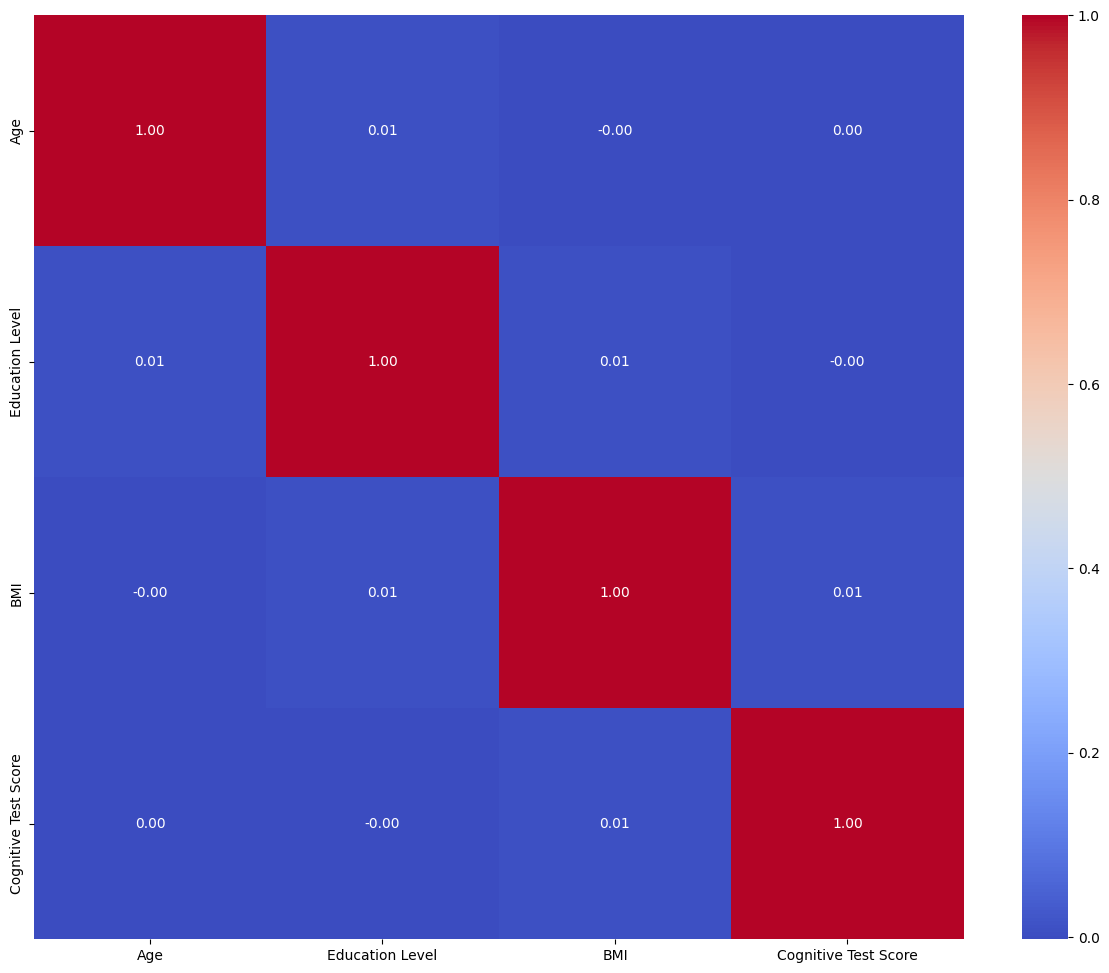

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

This heatmap includes all the encoded features. From this, we can infer that the only features that correlate with the 'Alzheimer diagnosis' are 'Age', 'History of Alzheimers_yes','History of Alzheimers_no', 'Genetic Risk Factor (APOE-ε4 allele)_yes', 'Genetic Risk Factor (APOE-ε4 allele)_no',

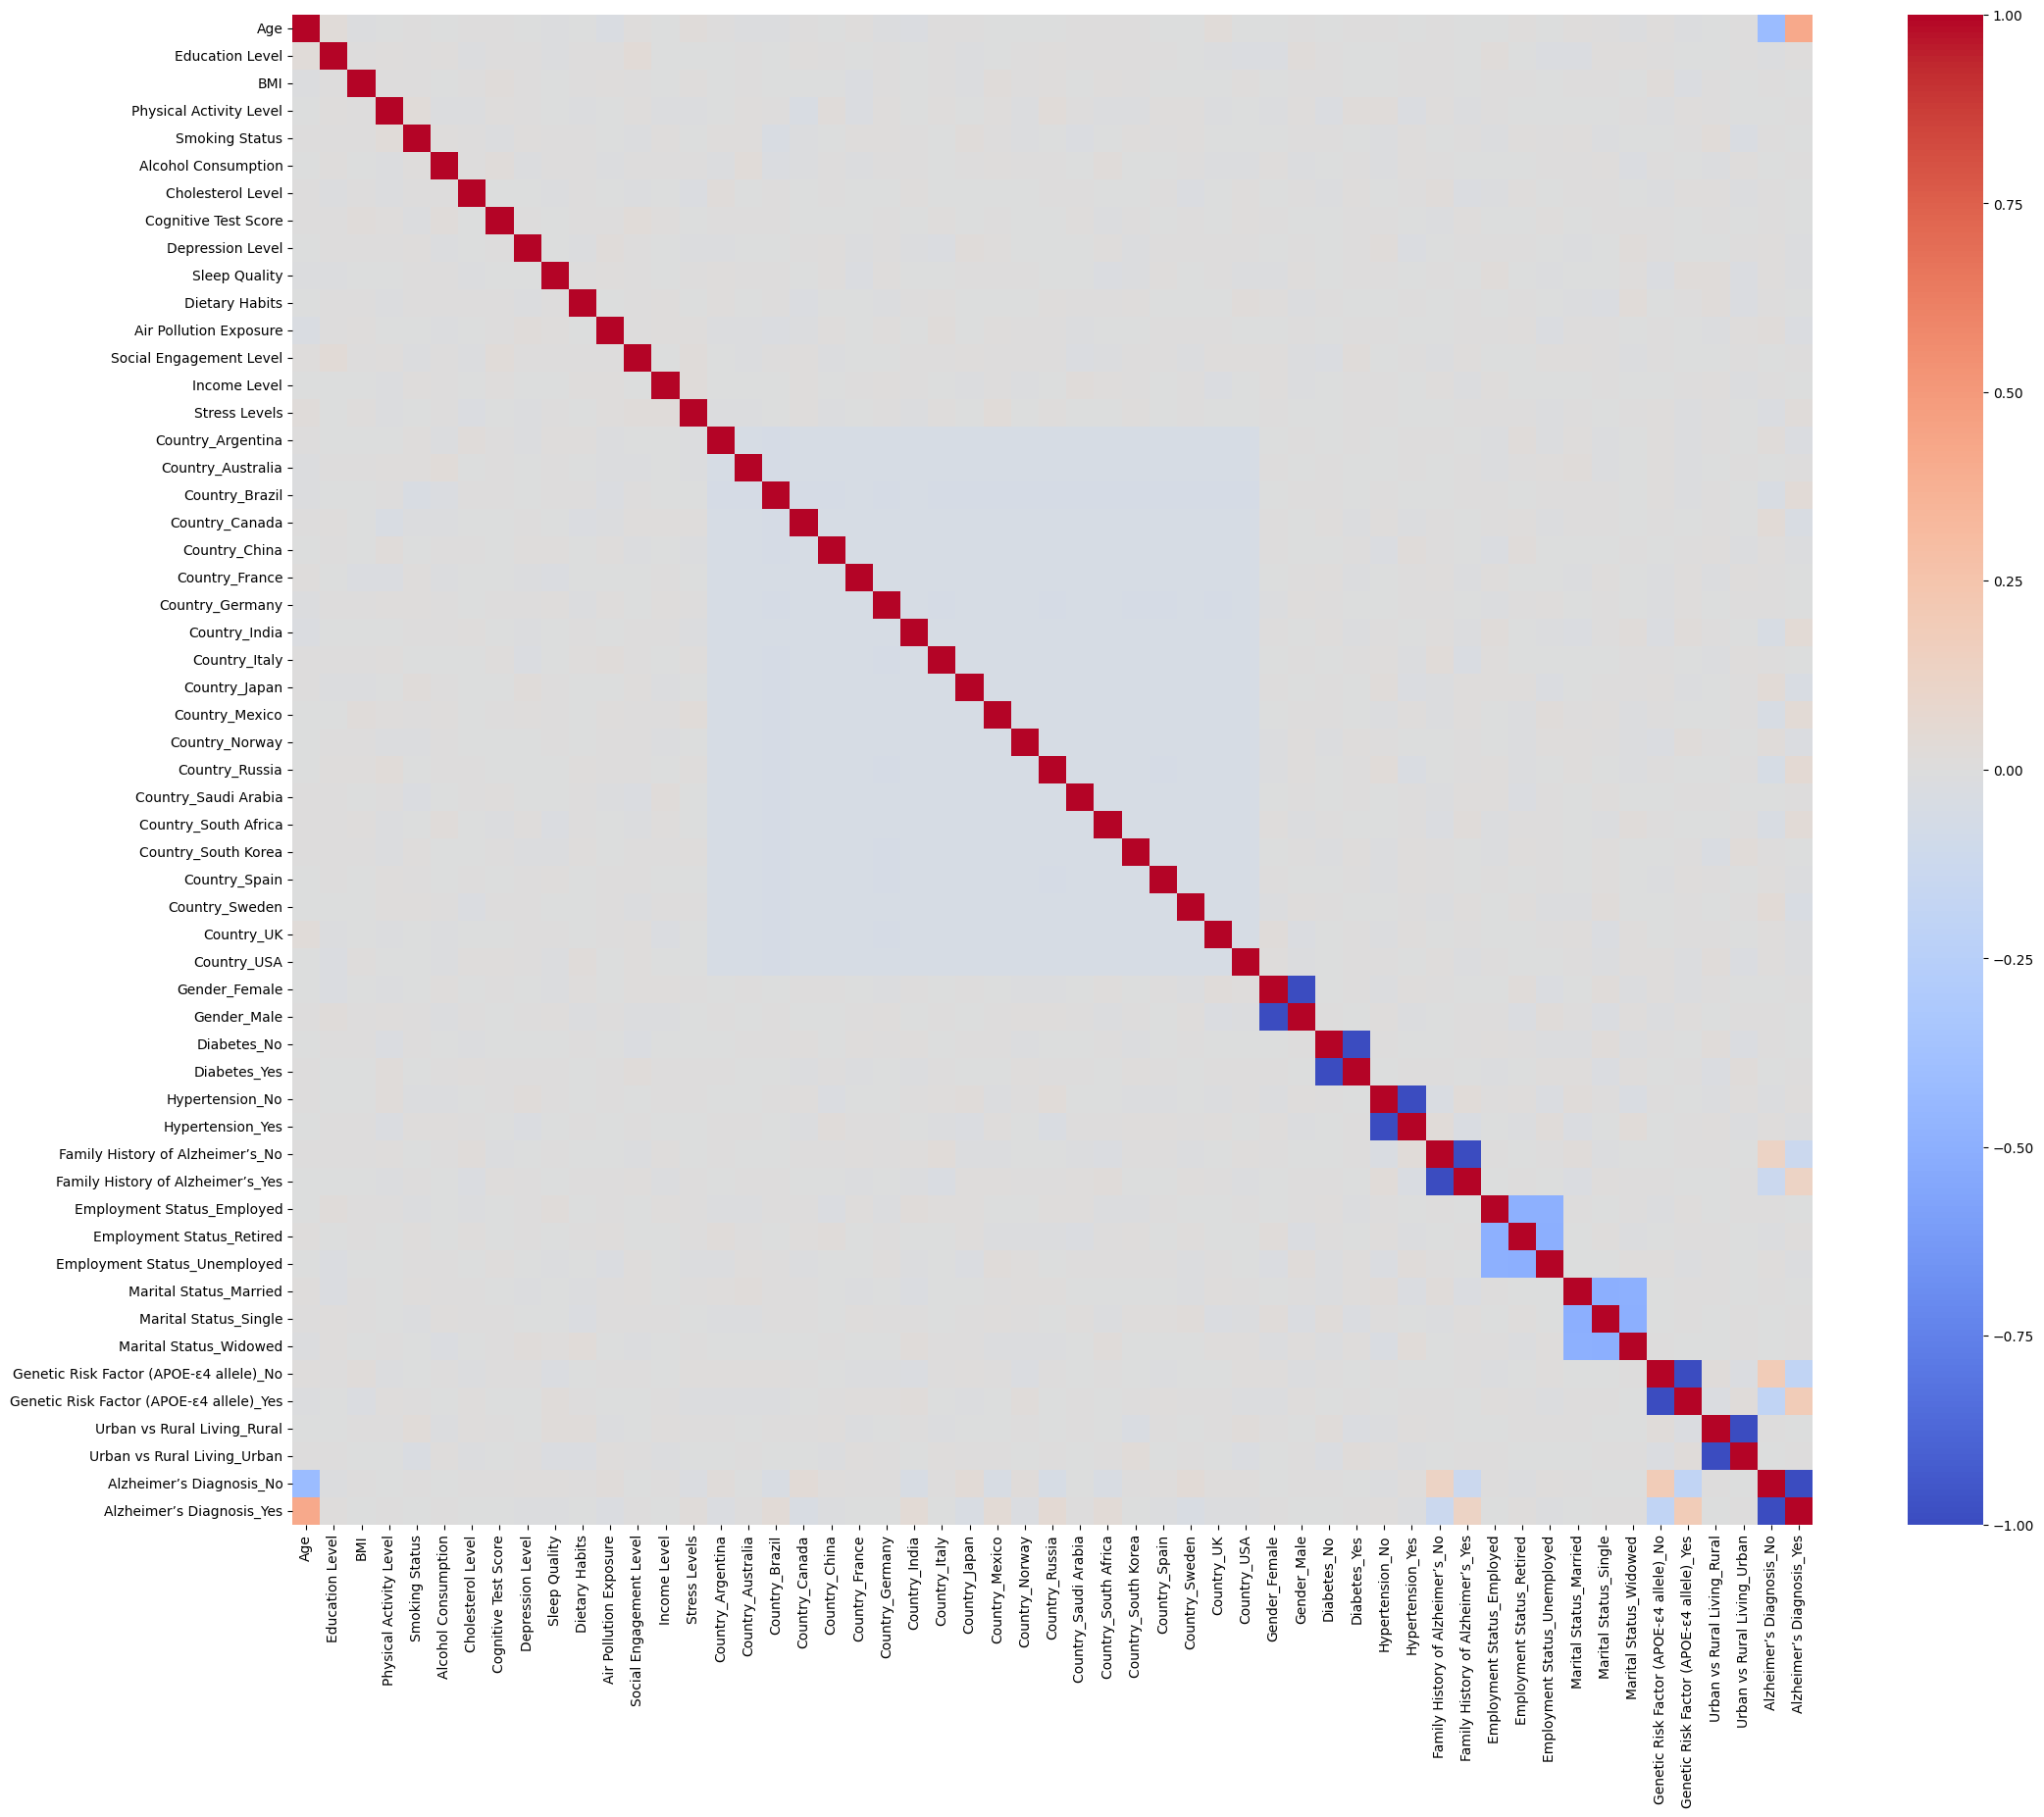

In [ ]:
plt.figure(figsize=(25,20))
sns.heatmap(df_encoded.corr(numeric_only=True), annot=False, cmap='coolwarm', fmt='.2f')
plt.show()

In [ ]:
correlated_features = ["Age", "Family History of Alzheimer’s_Yes", "Genetic Risk Factor (APOE-ε4 allele)_Yes"]
df_features = df_encoded[correlated_features]
df_label = df_encoded['Alzheimer’s Diagnosis_Yes']

In [ ]:
df_features

,Age,Family History of Alzheimer’s_Yes,Genetic Risk Factor (APOE-ε4 allele)_Yes
15,53,1,1
21249,94,0,0
31746,73,0,0
22796,86,0,0
73311,88,1,0
...,...,...,...
37194,69,1,0
6265,85,1,0
54886,70,0,1
860,77,0,0


In [ ]:
df_label

,Alzheimer’s Diagnosis_Yes
15,0
21249,1
31746,0
22796,0
73311,0
...,...
37194,1
6265,1
54886,1
860,0


In [ ]:
df_label.value_counts()

,count
Alzheimer’s Diagnosis_Yes,
0,6516
1,4514


# Hyperparameter tuning

## Training without regularization

# Task 2: Linear Models (OLS regression)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],
    'max_iter': [50, 100, 200],
    'fit_intercept': [True, False],
    # 'class_weight': [None, 'balanced'],
    # 'l1_ratio': np.linspace(0, 1, 5)
}


In [ ]:
gs_logreg = GridSearchCV(logreg, logreg_param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2, return_train_score=True)

# Fit the model
gs_logreg.fit(X_train_bestfeatures, y_train)


Fitting 5 folds for each of 384 candidates, totalling 1920 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
840 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_so

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [50, 100, 200],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg']},
             return_train_score=True, scoring='recall', verbose=2)

In [ ]:
print("Best Hyperparameters:", gs_logreg.best_params_)
print("Best Score:", gs_logreg.best_score_)

Best Hyperparameters: {'C': 0.01, 'fit_intercept': False, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.7377050629461293


In [ ]:
gs_logreg.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_fit_intercept', 'param_max_iter', 'param_penalty', 'param_solver', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree_param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    # 'class_weight': [None, 'balanced'],
    # 'splitter': ['best', 'random'],
}


In [ ]:
gs_tree = GridSearchCV(tree, tree_param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2, return_train_score=True)


gs_logreg.fit(X_train_bestfeatures, y_train)


print("Best Hyperparameters:", gs_logreg.best_params_)
print("Best Score:", gs_logreg.best_score_)

Fitting 5 folds for each of 9600 candidates, totalling 48000 fits


KeyboardInterrupt: 

In [ ]:
gs_tree.cv_results_ # see mean_train_score and main_test_scores

In [ ]:
gs_tree = GridSearchCV(tree, tree_param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2, return_train_score=True)


gs_logreg.fit(X_train_bestfeatures, y_train)


print("Best Hyperparameters:", gs_logreg.best_params_)
print("Best Score:", gs_logreg.best_score_)

In [ ]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    # 'class_weight': [None, 'balanced'],
}


In [ ]:
rf = RandomForestClassifier()

In [ ]:
def grid_search(model, param_grid, X, y):
  gs_model = GridSearchCV(model, param_grid, cv=5, scoring='recall', n_jobs=-1, verbose=2, return_train_score=True)


  gs_model.fit(X_train, y)
  return gs_model

In [ ]:
gs_rf = grid_search(rf, rf_param_grid, X_train_bestfeatures, y_train)

In [ ]:
svc = SVC()
svc_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'coef0': [0.0, 0.1, 0.5, 1.0],
    'class_weight': [None, 'balanced'],
}

gs_svc = grid_search(svc, svc_param_grid, X_train_bestfeatures, y_train)

In [ ]:
knn = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}
gs_knn = grid_search(knn, knn_param_grid, X_train_bestfeatures, y_train)

In [ ]:
gnb = GaussianNB()
gnb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5],
}
gs_gnb = grid_search(gnb, gnb_param_grid, X_train_bestfeatures, y_train)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
import numpy as np

In [ ]:
best_weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T, X_train)), X_train.T), y_train)
print(best_weights.shape)

(3,)


In [ ]:
y_pred = np.matmul(X_test, best_weights)


In [ ]:
y_pred_binary = (y_pred > 0.5).astype(int)

In [ ]:
print(y_pred)

[0.31199902 0.33716023 0.55275345 ... 0.47303077 0.47303077 0.41264387]


In [ ]:
from sklearn.metrics import r2_score, root_mean_squared_error as rmse

In [ ]:
print(y_pred)

[0.31199902 0.33716023 0.55275345 ... 0.47303077 0.47303077 0.41264387]


In [ ]:
ols_r2_test = r2_score(y_test, y_pred_binary)
print(ols_r2_test)

-0.35666564168507


In [ ]:
ols_r2_rmse = rmse(y_test, y_pred_binary)
print(ols_r2_rmse)

0.5736745138747642


Text(0, 0.5, 'Predicted values')

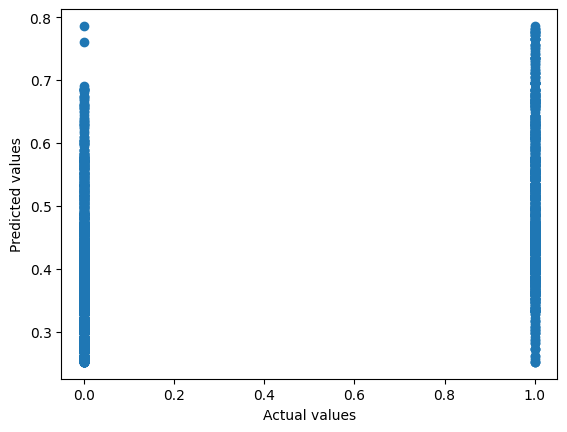

In [ ]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

<Axes: >

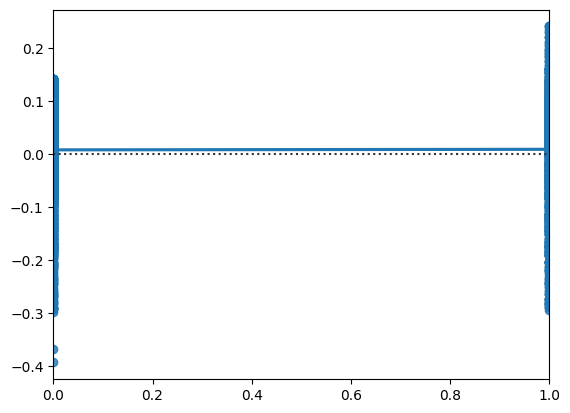

In [ ]:
plt.figure()
sns.residplot(x=y_test, y=y_test-y_pred, lowess=True)

# Task 3: Regularization

## Underfitting
To achieve this, I can set one parameter to 0. This will decrease the complexity of the model

In [ ]:
print(best_weights)

[0.00503224 0.10245853 0.21056098]


In [ ]:
biased_weights = copy.deepcopy(best_weights)
biased_weights[-1] = 0

NameError: name 'copy' is not defined

In [ ]:
print(biased_weights)
print(best_weights)

Or, I can even zero out the 2nd parameter to achieve even greater bias

In [ ]:
more_biased_weights = copy.deepcopy(best_weights)
more_biased_weights[1] = more_biased_weights[2] = 0
print(more_biased_weights)

In [ ]:
biased_pred = (np.matmul(X_test, biased_weights) >= 0.5).astype(int)
print(r2_score(y_test, biased_pred))
print(rmse(y_test, biased_pred))

In [ ]:
more_biased_pred = (np.matmul(X_test, more_biased_weights) >= 0.5).astype(int)
print(r2_score(y_test, more_biased_pred))
print(rmse(y_test, more_biased_pred))

It looks like my model is already underfitting. But, with newer biased weights the error is slightly higher and with more biased weights, the error is the highest

## Overfitting

To achieve overfitting, I can include all the other features as well. This should work because I am assuming that those features are not correlated with the target label and hence will server as noise. Moreover, it will require more parameters to fit the model. So, we are essentially fitting the noise

In [ ]:
df_encoded_linear

In [ ]:
df_features_all = df_encoded_linear.drop(columns=['Alzheimer’s Diagnosis_Yes'])

In [ ]:
X_noisy = df_features_all.values
X_train_noisy, X_test_noisy, y_train_noisy, y_test_noisy = train_test_split(X_noisy,y,test_size=0.2, random_state=42)

In [ ]:
variance_weights = np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train_noisy.T, X_train_noisy)), X_train_noisy.T), y_train_noisy)

variance_pred = (np.matmul(X_test_noisy, variance_weights) >= 0.5).astype(int)
print(r2_score(y_test_noisy, variance_pred))
print(rmse(y_test_noisy, variance_pred))

In [ ]:
variance_pred_train = (np.matmul(X_train_noisy, variance_weights) >= 0.5).astype(int)

print(r2_score(y_train_noisy, variance_pred_train))
print(rmse(y_train_noisy, variance_pred_train))

Well, the rmse is slightly lower, 0.54 instead of 0.56 (my initial score with 3 parameters). But, both train and test accuracies seem to match. So, it's still underfitting, not overfitting. Then, what I would do is to cut the number of samples.

## Regularization

I think there is no point in using either Lasso or Ridge on my features consisting of 3 columns only because:


*   their weights are already close to 0
*   I have already selected highly correlated features

Hence, I am going to use all features and apply Lasso regularization on it in an attempt to select best features



In [ ]:
lasso = Lasso(alpha=0.1)

In [ ]:
lasso.fit(X_train_noisy, y_train_noisy)

In [ ]:
print(lasso.coef_)
print(len(lasso.coef_))

Lasso removed all the features but the first one, which is Age. Let's see how it predicts

In [ ]:
lasso_weights = lasso.coef_
lasso_bias = lasso.intercept_

y_test_lasso = ((np.matmul(X_test_noisy, lasso_weights)+lasso_bias)>=0.5).astype(int)
print(r2_score(y_test_noisy, y_test_lasso))
print(rmse(y_test_noisy, y_test_lasso))

It's slightly better than our initial model which gave -0.30 for R2 and 0.56 for rmse

Let's try with different alphas

In [ ]:
alphas = np.logspace(-2, 1, 10)
print(alphas)
print(len(alphas))


In [ ]:
coefs = list()

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

In [ ]:
print(coefs)

In [ ]:
plt.figure()
plt.plot(alphas, np.array(coefs))
plt.xscale("log")
plt.xlabel("Alphas")
plt.ylabel("Coefficients")

It's clear that as we increase the penalty term the coefficients tend towards 0

# Task 4 linear models for classification

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [ ]:
lda = LinearDiscriminantAnalysis()
logreg = LogisticRegression()
nb = BernoulliNB()

In [ ]:
lda.fit(X_train, y_train)
logreg.fit(X_train, y_train)
nb.fit(X_train, y_train)

In [ ]:
print(lda.predict(X_test))

In [ ]:
x_test_pred_lda = lda.predict(X_test)
x_test_pred_logreg = logreg.predict(X_test)
x_test_pred_nb = nb.predict(X_test)

In [ ]:
acc_lda = accuracy_score(y_test, x_test_pred_lda)
acc_logreg = accuracy_score(y_test, x_test_pred_logreg)
acc_nb = accuracy_score(y_test, x_test_pred_nb)

In [ ]:
print(accuracy_score(y_train, x_test_pred_lda))
print(accuracy_score(y_train, x_test_pred_logreg))
print(accuracy_score(y_train, x_test_pred_nb))

In [ ]:
print(acc_lda)
print(acc_logreg)
print(acc_nb)

Because both train and test accuracies are similar, there is no overfiting

In [ ]:
prec_lda = precision_score(y_test, x_test_pred_lda)
prec_logreg = precision_score(y_test, x_test_pred_logreg)
prec_nb = precision_score(y_test, x_test_pred_nb)

In [ ]:
print(prec_lda)
print(prec_logreg)
print(prec_nb)

In [ ]:
rec_lda = recall_score(y_test, x_test_pred_lda)
rec_logreg = recall_score(y_test, x_test_pred_logreg)
rec_nb = recall_score(y_test, x_test_pred_nb)

In [ ]:
print(rec_lda)
print(rec_logreg)
print(rec_nb)

In [ ]:
f1_lda = f1_score(y_test, x_test_pred_lda)
f1_logreg = f1_score(y_test, x_test_pred_logreg)
f1_nb = f1_score(y_test, x_test_pred_nb)

In [ ]:
print(f1_lda)
print(f1_logreg)
print(f1_nb)

Although the accuracy of the Bernoulli Naive Bayes Classifier seems reasonable when compared to other 2 models, its f1 score is terrible. Which means, that it tends to be biased towards one class

In [ ]:
cm_test_lda = confusion_matrix(y_test, x_test_pred_lda)
cm_test_logreg = confusion_matrix(y_test, x_test_pred_logreg)
cm_test_nb = confusion_matrix(y_test, x_test_pred_nb)

In [ ]:
sns.heatmap(cm_test_lda, annot=True, fmt='d', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

In [ ]:
sns.heatmap(cm_test_logreg, annot=True, fmt='d', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

In [ ]:
sns.heatmap(cm_test_nb, annot=True, fmt='d', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])

In [ ]:
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, lda.predict_proba(X_test)[:, 1])
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg.predict_proba(X_test)[:, 1])
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, nb.predict_proba(X_test)[:, 1])

In [ ]:
plt.plot(fpr_lda, tpr_lda)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')